In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score 

In [48]:
predictions_path = 'Predictions_meditation_04-08-23:14.csv'


In [49]:
preds = pd.read_csv(predictions_path, header=None)


In [50]:
ys = [preds.iloc[i][2:].to_numpy() for i in range(0,40,2)]

yhats = [preds.iloc[i][2:].to_numpy() for i in range(1,41,2)]

In [51]:
np.mean([confusion_matrix(y, yhat) for y,yhat in zip(ys,yhats)], axis=0)


array([[3.35, 0.65],
       [0.35, 6.65]])

In [53]:
np.mean([balanced_accuracy_score(y, yhat, adjusted=False) for y,yhat in zip(ys,yhats)])


0.89375

In [29]:
balanced_accuracy_score(y, yhats[7])

0.6607142857142857

In [35]:
print(y)
print(yhats[-1])

[1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
[1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]


In [40]:
np.mean(np.not_equal(y, yhats[-5]).astype(int))

0.6363636363636364

In [2]:
from utils import load_Xy
from lol import LOL
from scipy.sparse.linalg import svds
from graspy.plot import pairplot

ModuleNotFoundError: No module named 'lol'

In [3]:
X,y = load_Xy()

In [8]:
u,s,v = svds(X, k=4)
Xhat = u @ np.diag(s)

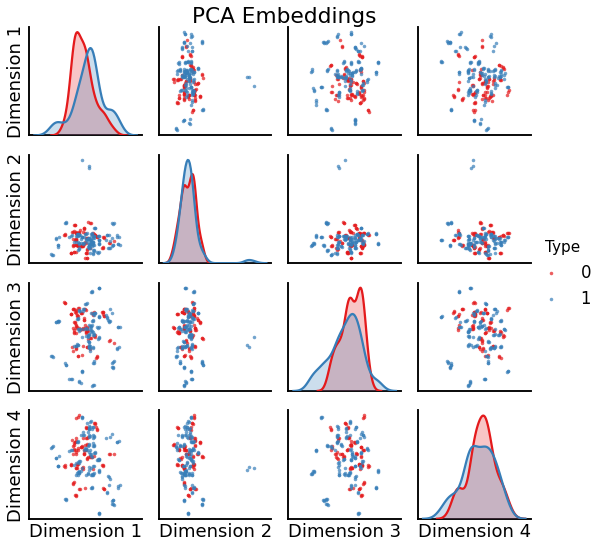

In [22]:
pairplot(Xhat, (y/3).astype(int), height=2, title='PCA Embeddings')

In [ ]:
lmao = LOL(n_components=6, svd_solver='full')
lmao.fit(X, (y/3).astype(int))

In [29]:
Xhat2 = lmao.transform(X)

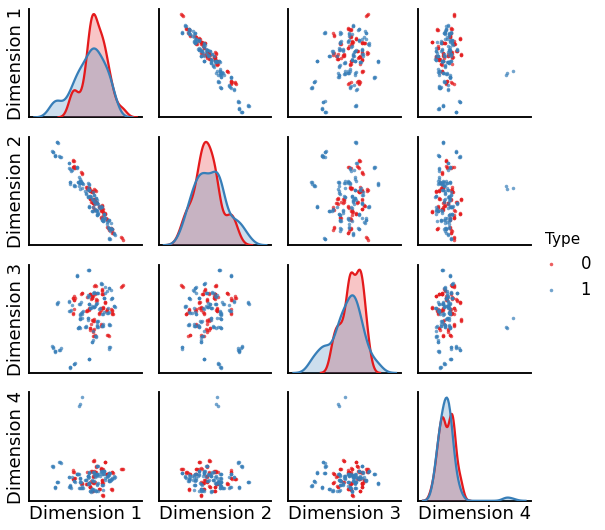

In [31]:
pairplot(Xhat2, (y/3).astype(int), height=2)